# Salary


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [59]:
df=pd.read_csv("Data.csv")
df.head(8)

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,xyz,No
4,Germany,40,NaN,Yes
5,France,abc,58000,Yes
6,Spain,NaN,52000,No
7,France,48,79000,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    20 non-null     object 
 1   Age        15 non-null     float64
 2   Salary     17 non-null     float64
 3   Purchased  18 non-null     object 
dtypes: float64(2), object(2)
memory usage: 768.0+ bytes


In [4]:
df.describe()

,Age,Salary
count,15.000000,17.000000
mean,38.733333,62470.588235
std,8.039782,11816.924553
min,27.000000,48000.000000
25%,32.500000,54000.000000
50%,38.000000,58000.000000
75%,46.000000,72000.000000
max,50.000000,83000.000000


In [5]:
df.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [6]:
df.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [7]:
a=df['Country'].unique()
print(a)

['France' 'Spain' 'Germany']


In [8]:
df.shape

(20, 4)

In [9]:
columns_exclude = ['Country', 'Purchased']
columns_to_convert = df.drop(columns=columns_exclude)
columns_to_convert = columns_to_convert.map(lambda x: pd.to_numeric(x, errors='coerce'))
df[columns_to_convert.columns] = columns_to_convert
print(df)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0      NaN        No
4   Germany  40.0      NaN       Yes
5    France   NaN  58000.0       Yes
6     Spain   NaN  52000.0        No
7    France  48.0  79000.0       NaN
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
10   France   NaN  72000.0        No
11    Spain  27.0  48000.0       Yes
12  Germany  30.0  54000.0        No
13    Spain   NaN  61000.0        No
14  Germany  40.0  54000.0       Yes
15   France  35.0  58000.0       Yes
16    Spain   NaN  52000.0        No
17   France  48.0      NaN       NaN
18  Germany  50.0  83000.0        No
19   France  37.0  67000.0       Yes


In [10]:
df.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,False,False,True,False
5,False,True,False,False
6,False,True,False,False
7,False,False,False,True
8,False,False,False,False
9,False,False,False,False


In [11]:
df.isnull().sum()

Country      0
Age          5
Salary       3
Purchased    2
dtype: int64

In [12]:
print("percentage null value in the data") 
df.isnull().sum()/df.shape[0]*100

percentage null value in the data


Country       0.0
Age          25.0
Salary       15.0
Purchased    10.0
dtype: float64

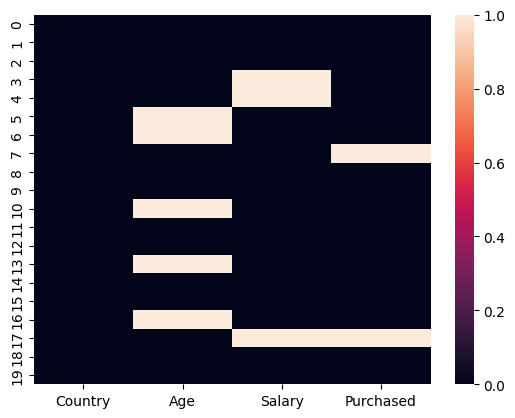

In [13]:
sns.heatmap(df.isnull())
plt.show()

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [15]:
df.fillna(method='pad',inplace=True)  # Forward fill

C:\Users\HP\AppData\Local\Temp\ipykernel_17516\1811936208.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='pad',inplace=True)  # Forward fill


In [16]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,54000.0,No
4,Germany,40.0,54000.0,Yes


In [17]:
# from sklearn.preprocessing import OneHotEncoder
# cat=df.select_dtypes(include=['object']).columns
# encoder=OneHotEncoder(sparse_output=False)
# onehotencoded=encoder.fit_transform(df[cat])


In [18]:
# from sklearn.preprocessing import OneHotEncoder

# # Assuming 'df' is your DataFrame
# cat = df.select_dtypes(include=['object']).columns  # Select categorical columns

# # Label Encoding
# label = {}
# for col in cat:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label[col] = le

# # One-Hot Encoding
# encoder = OneHotEncoder(sparse_output=False)  # Use drop='first' to avoid multicollinearity
# encoded_columns = encoder.fit_transform(df[cat])  # Transform the categorical data
# # Output the transformed DataFrame
# print(df)


In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False).set_output(transform="pandas")
ohetransform=ohe.fit_transform(df[['Country','Purchased']])
ohetransform

,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,1.0,0.0
7,1.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,1.0


In [20]:
df=pd.concat([df,ohetransform],axis=1).drop(columns=['Country','Purchased'])
df.head()

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.0,72000.0,1.0,0.0,0.0,1.0,0.0
1,27.0,48000.0,0.0,0.0,1.0,0.0,1.0
2,30.0,54000.0,0.0,1.0,0.0,1.0,0.0
3,38.0,54000.0,0.0,0.0,1.0,1.0,0.0
4,40.0,54000.0,0.0,1.0,0.0,0.0,1.0


# Titanic

In [21]:
titanic=pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
titanic.shape

(891, 12)

In [25]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
titanic = titanic.map(lambda x: pd.to_numeric(x, errors='coerce'))
print(titanic)

     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch    Ticket  \
0              1         0       3   NaN  NaN  22.0      1      0       NaN   
1              2         1       1   NaN  NaN  38.0      1      0       NaN   
2              3         1       3   NaN  NaN  26.0      0      0       NaN   
3              4         1       1   NaN  NaN  35.0      1      0  113803.0   
4              5         0       3   NaN  NaN  35.0      0      0  373450.0   
..           ...       ...     ...   ...  ...   ...    ...    ...       ...   
886          887         0       2   NaN  NaN  27.0      0      0  211536.0   
887          888         1       1   NaN  NaN  19.0      0      0  112053.0   
888          889         0       3   NaN  NaN   NaN      1      2       NaN   
889          890         1       1   NaN  NaN  26.0      0      0  111369.0   
890          891         0       3   NaN  NaN  32.0      0      0  370376.0   

        Fare  Cabin  Embarked  
0     7.2500    NaN

In [28]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name           891
Sex            891
Age            177
SibSp            0
Parch            0
Ticket         230
Fare             0
Cabin          891
Embarked       891
dtype: int64

In [29]:
titanic.drop(columns=['Cabin'],inplace=True)

In [30]:
titanic.isnull().sum()/titanic.shape[0]*100

PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name           100.000000
Sex            100.000000
Age             19.865320
SibSp            0.000000
Parch            0.000000
Ticket          25.813692
Fare             0.000000
Embarked       100.000000
dtype: float64

In [31]:
total_cells = titanic.size
missing_cells= titanic.isnull().sum().sum()

null = (missing_cells / total_cells) * 100

print(null.round(2),"%")


31.43 %


In [32]:
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)

In [33]:
titanic.fillna(method='bfill')

C:\Users\HP\AppData\Local\Temp\ipykernel_17516\757857185.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic.fillna(method='bfill')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,NaN,NaN,22.0,1,0,113803.0,7.2500,NaN
1,2,1,1,NaN,NaN,38.0,1,0,113803.0,71.2833,NaN
2,3,1,3,NaN,NaN,26.0,0,0,113803.0,7.9250,NaN
3,4,1,1,NaN,NaN,35.0,1,0,113803.0,53.1000,NaN
4,5,0,3,NaN,NaN,35.0,0,0,373450.0,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,NaN,NaN,27.0,0,0,211536.0,13.0000,NaN
887,888,1,1,NaN,NaN,19.0,0,0,112053.0,30.0000,NaN
888,889,0,3,NaN,NaN,28.0,1,2,111369.0,23.4500,NaN
889,890,1,1,NaN,NaN,26.0,0,0,111369.0,30.0000,NaN


In [34]:
# convert age as int
titanic['Age'] =titanic['Age'].astype(int)


In [35]:
titanic.drop(columns=['Name',"PassengerId","Ticket"],inplace=True)

In [36]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False).set_output(transform="pandas")
ohetransform=ohe.fit_transform(titanic[['Sex','Embarked']])
ohetransform

,Sex_nan,Embarked_nan
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
886,1.0,1.0
887,1.0,1.0
888,1.0,1.0
889,1.0,1.0


In [37]:
titanic=pd.concat([titanic,ohetransform],axis=1).drop(columns=['Sex',"Embarked"])
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_nan,Embarked_nan
0,0,3,22,1,0,7.2500,1.0,1.0
1,1,1,38,1,0,71.2833,1.0,1.0
2,1,3,26,0,0,7.9250,1.0,1.0
3,1,1,35,1,0,53.1000,1.0,1.0
4,0,3,35,0,0,8.0500,1.0,1.0


In [38]:
df_transposed = titanic.T
df_transposed = df_transposed.drop_duplicates()
titanic = df_transposed.T

In [39]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_nan
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0


# New York AirBnB 

In [40]:
airbnb=pd.read_csv('AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [41]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [42]:
airbnb.shape

(48895, 16)

In [43]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [44]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [45]:
airbnb= airbnb.map(lambda x: pd.to_numeric(x, errors='coerce'))
print(airbnb)

             id  name   host_id  host_name  neighbourhood_group  \
0          2539   NaN      2787        NaN                  NaN   
1          2595   NaN      2845        NaN                  NaN   
2          3647   NaN      4632        NaN                  NaN   
3          3831   NaN      4869        NaN                  NaN   
4          5022   NaN      7192        NaN                  NaN   
...         ...   ...       ...        ...                  ...   
48890  36484665   NaN   8232441        NaN                  NaN   
48891  36485057   NaN   6570630        NaN                  NaN   
48892  36485431   NaN  23492952        NaN                  NaN   
48893  36485609   NaN  30985759        NaN                  NaN   
48894  36487245   NaN  68119814        NaN                  NaN   

       neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0                NaN  40.64749  -73.97237        NaN    149               1   
1                NaN  40.75362  -73.9

In [46]:
airbnb.isnull().sum()

id                                    0
name                              48891
host_id                               0
host_name                         48889
neighbourhood_group               48895
neighbourhood                     48895
latitude                              0
longitude                             0
room_type                         48895
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       48895
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [47]:
airbnb.drop(columns=['last_review','reviews_per_month'],inplace=True)

In [48]:
airbnb.isnull().sum()/airbnb.shape[0]*100

id                                  0.000000
name                               99.991819
host_id                             0.000000
host_name                          99.987729
neighbourhood_group               100.000000
neighbourhood                     100.000000
latitude                            0.000000
longitude                           0.000000
room_type                         100.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
dtype: float64

In [49]:
total=airbnb.size
missing_cell=airbnb.isnull().sum().sum()
total_null=(missing_cell/total)*100
print(total_null.round(3),'%')


35.713 %


In [50]:
airbnb.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [51]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [52]:
airbnb.drop(columns=['id','host_name','name','host_id'],inplace=True)

In [53]:
airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,NaN,NaN,40.64749,-73.97237,NaN,149,1,9,6,365
1,NaN,NaN,40.75362,-73.98377,NaN,225,1,45,2,355
2,NaN,NaN,40.80902,-73.94190,NaN,150,3,0,1,365
3,NaN,NaN,40.68514,-73.95976,NaN,89,1,270,1,194
4,NaN,NaN,40.79851,-73.94399,NaN,80,10,9,1,0


In [54]:
airbnb.select_dtypes(['object']).columns

Index([], dtype='object')

In [55]:
a=airbnb['room_type'].unique()
b=airbnb['neighbourhood_group'].unique()
c=airbnb['neighbourhood'].unique()
print(f'{a}\n,{b}\n,{c}\n')

[nan]
,[nan]
,[nan]



In [56]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False).set_output(transform="pandas")
ohetransform=ohe.fit_transform(airbnb[['room_type','neighbourhood_group']])
ohetransform

,room_type_nan,neighbourhood_group_nan
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
48890,1.0,1.0
48891,1.0,1.0
48892,1.0,1.0
48893,1.0,1.0


In [57]:
airbnb=pd.concat([airbnb,ohetransform],axis=1).drop(columns=['room_type','neighbourhood_group'])
airbnb.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_nan,neighbourhood_group_nan
0,NaN,40.64749,-73.97237,149,1,9,6,365,1.0,1.0
1,NaN,40.75362,-73.98377,225,1,45,2,355,1.0,1.0
2,NaN,40.80902,-73.94190,150,3,0,1,365,1.0,1.0
3,NaN,40.68514,-73.95976,89,1,270,1,194,1.0,1.0
4,NaN,40.79851,-73.94399,80,10,9,1,0,1.0,1.0


In [58]:
airbnb.shape

(48895, 10)